In [1]:
pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.3 MB/s eta 0:00:00
ERROR: Operation cancelled by user


In [2]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import os
import pyreadstat

ModuleNotFoundError: No module named 'pyreadstat'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = '/content/drive/MyDrive/_data/BRFSS/'

In [ ]:
# df_2018 = pd.read_sas(data_path+'LLCP2018.XPT ')
# df_2019 = pd.read_sas(data_path+'LLCP2019.XPT ')
# df_2020 = pd.read_sas(data_path+'LLCP2020.XPT ')
# df_2021 = pd.read_sas(data_path+'LLCP2021.XPT ')
df_2022 = pd.read_sas(data_path+'LLCP2022.XPT ')
# dfs = [df_2018, df_2019, df_2020, df_2021, df_2022]

In [ ]:
def preprocess1(df):
  df.dropna(subset = ['CIMEMLOS'], inplace=True)
  return df[df['CIMEMLOS'] < 3]

In [ ]:
# df2018 = preprocess1(df_2018)
# df2019 = preprocess1(df_2019)
# df2020 = preprocess1(df_2020)
# df2021 = preprocess1(df_2021)
df2022 = preprocess1(df_2022)

In [ ]:
df2022.reset_index(drop=True, inplace=True)

In [ ]:
df2022_CD = df2022[df2022['CIMEMLOS'] == 1][['CIMEMLOS', 'CDHOUSE', 'CDASSIST','CDSOCIAL', 'CDDISCUS']]

In [ ]:
condition1 = (df2022_CD['CDHOUSE'] == 7) | (df2022_CD['CDASSIST'] == 7) | (df2022_CD['CDSOCIAL'] == 7) | (df2022_CD['CDDISCUS'] == 7)
condition2 = (df2022_CD['CDHOUSE'] == 9) | (df2022_CD['CDASSIST'] == 9) | (df2022_CD['CDSOCIAL'] == 9) | (df2022_CD['CDDISCUS'] == 9)
condition3 = (df2022_CD['CDHOUSE'].isna()) | (df2022_CD['CDASSIST'].isna()) | (df2022_CD['CDSOCIAL'].isna()) | (df2022_CD['CDDISCUS'].isna())

In [ ]:
idx_remove = df2022_CD[(condition1) | (condition2) | condition3].index
idx_remove

Index([  107,   240,  1058,  1134,  1181,  1190,  1207,  1237,  1386,  1387,
       ...
       62466, 62550, 62603, 62632, 62686, 62954, 63217, 63281, 63565, 63750],
      dtype='int64', length=318)

In [ ]:
df2022_CD.drop(idx_remove).isna().sum()

CIMEMLOS    0
CDHOUSE     0
CDASSIST    0
CDSOCIAL    0
CDDISCUS    0
dtype: int64

In [ ]:
(df2022_CD.drop(idx_remove)).to_csv('df2022_CD.csv', index=True)

In [ ]:
os.listdir(data_path)

['LLCP2018.XPT ',
 'LLCP2019.XPT ',
 'LLCP2020.XPT ',
 'LLCP2021.XPT ',
 'LLCP2022.XPT ',
 'Data_Xinya_0409.csv',
 'Data_all_0409.csv',
 'Data_CD_0409.csv',
 'Data_for_binary_0409.csv',
 'Data_CD_wiClasses.csv',
 'df2022_CDwiClasses.csv']

In [ ]:
df2022_CDwiClasses = pd.read_csv(data_path+'df2022_CDwiClasses.csv', index_col=0)
class_mapping = {1: 'Severe CD', 2: 'Moderate CD', 3: 'Mild CD'}
df2022_CDwiClasses.Class = df2022_CDwiClasses.Class.map(class_mapping)
df2022_CDwiClasses

In [ ]:
df2022_CDwiClasses.Class

0            Mild
2            Mild
21           Mild
35       Moderate
37           Mild
           ...   
63901    Moderate
63929        Mild
63934        Mild
63937        Mild
63946        Mild
Name: Class, Length: 6685, dtype: object

In [ ]:
df2022_all = df2022.drop(idx_remove)
df2022_all['Class'] = df2022_CDwiClasses.Class

In [ ]:
df2022_all.Class = df2022_all.Class.fillna('No CD')
df2022_all.reset_index(drop=True, inplace=True)

In [ ]:
df2022_all.to_csv('/content/drive/MyDrive/Colab Notebooks/Data Mining/Data/df2022_WiClass.csv', index=False)

In [ ]:
df2022_all

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,Class
0,12.0,1.0,b'02222022',b'02',b'22',b'2022',1100.0,b'2022000244',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,2.300000e+01,1.0,1.0,9.0,2.0,Mild CD
1,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000245',2.022000e+09,1.0,...,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0,No CD
2,12.0,1.0,b'02202022',b'02',b'20',b'2022',1100.0,b'2022000246',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,2.300000e+01,1.0,1.0,1.0,2.0,Mild CD
3,12.0,1.0,b'03032022',b'03',b'03',b'2022',1100.0,b'2022000247',2.022000e+09,1.0,...,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,No CD
4,12.0,1.0,b'02242022',b'02',b'24',b'2022',1100.0,b'2022000248',2.022000e+09,1.0,...,NaN,1.0,3.000000e+00,1.0,4.700000e+01,1.0,1.0,1.0,1.0,No CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63625,55.0,12.0,b'01202023',b'01',b'20',b'2023',1100.0,b'2022011262',2.022011e+09,NaN,...,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,No CD
63626,55.0,12.0,b'01062023',b'01',b'06',b'2023',1100.0,b'2022011267',2.022011e+09,NaN,...,NaN,1.0,7.000000e+00,1.0,9.300000e+01,1.0,NaN,NaN,2.0,No CD
63627,55.0,12.0,b'01122023',b'01',b'12',b'2023',1100.0,b'2022011268',2.022011e+09,NaN,...,NaN,1.0,1.400000e+01,1.0,1.000000e+02,1.0,1.0,1.0,2.0,No CD
63628,55.0,12.0,b'01172023',b'01',b'17',b'2023',1100.0,b'2022011269',2.022011e+09,NaN,...,NaN,1.0,5.000000e+01,1.0,3.500000e+02,1.0,NaN,NaN,2.0,Mild CD


In [ ]:
# features_kept_2018=['SEX1', '_AGE80', '_RACE', '_EDUCAG', '_INCOMG', 'EMPLOY1', 'GENHLTH',
#                     'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'EMTSUPRT',
#                     '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
#                     'ADDEPEV2', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

# features_kept_2019=['_SEX', '_AGE80', '_RACE', '_EDUCAG', '_INCOMG', 'EMPLOY1', 'GENHLTH',
#                     'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'EMTSUPRT',
#                     '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
#                     'ADDEPEV3', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

# features_kept_2020=['_SEX', '_AGE80', '_RACE', '_EDUCAG', '_INCOMG', 'EMPLOY1', 'GENHLTH',
#                     'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'EMTSUPRT',
#                     '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
#                     'ADDEPEV3', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

# features_kept_2021=['_SEX', '_AGE80', '_RACE', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'GENHLTH',
#                     'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'EMTSUPRT',
#                     '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
#                     'ADDEPEV3', 'SMOKE100', 'EXERANY2', 'CIMEMLOS']

features_kept_2022=['_SEX', '_AGE80', 'RRCLASS3', '_EDUCAG', '_INCOMG1', 'EMPLOY1', 'GENHLTH',
                    'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES','DIFFALON', 'DECIDE', #'EMTSUPRT',
                    '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
                    'ADDEPEV3', 'SMOKE100', 'EXERANY2',
                    'CIMEMLOS', 'CDHOUSE', 'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS']


# features_kept2 = ['SEXVAR','GENHLTH','MENTHLTH','EXERANY2','SLEPTIM1',
#                   'CVDINFR4','CHCOCNC1','ADDEPEV3','CHCKDNY2','DIABETE4','MARITAL','VETERAN3','WEIGHT2','HEIGHT3',
#                   'DEAF','BLIND','DECIDE','DIFFWALK','DIFFDRES','DIFFALON','COVIDPOS',
#                   'CIMEMLOS','LSATISFY','EMTSUPRT','SDHISOLT','SDHEMPLY',
#                   'SDHFOOD1','SDHBILLS','SDHUTILS','SDHTRNSP','SDHSTRE1','_URBSTAT','_IMPRACE','_RFHLTH','_PHYS14D','_MENT14D',
#                   '_TOTINDA','_MICHD','_ASTHMS1','_DRDXAR2','_AGE80','_CHLDCNT','_EDUCAG','_INCOMG1','_SMOKER3','_CURECI2','_DRNKWK2',
#                   '_AIDTST4','_RFBMI5']

# df2 = df_2015[features_kept]; df3 = df[features_kept2]

In [ ]:
yr = 2018
for i in range(5):
  f = features[i]
  d = dfs[i]
  for j in f:
    if j not in d.columns:
      print(yr, j)
  yr+=1

In [ ]:
#@title previous years
# df2018.rename(columns={'SEX1': '_SEX'}, inplace=True)
# df2018.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2018.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)
# df2018.rename(columns={'ADDEPEV2': 'ADDEPEV3'}, inplace=True)
# df2019.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2020.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2021.rename(columns={'_RACE': 'RRCLASS3'}, inplace=True)
# df2019.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)
# df2020.rename(columns={'_INCOMG': '_INCOMG1'}, inplace=True)

In [ ]:
def sel_features(df, features):
  return df[features]

In [ ]:
df2018 = sel_features(df2018, features_kept_2022)
df2019 = sel_features(df2019, features_kept_2022)
df2020 = sel_features(df2020, features_kept_2022)
df2021 = sel_features(df2021, features_kept_2022)
df2022 = sel_features(df2022, features_kept_2022)

In [ ]:
def remove_blanks(df, column, unknown=7, refused=9):
  remove_idx = df[(df[column] == unknown) | (df[column] == refused)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  return df2

In [ ]:
df2019.head()

In [ ]:
mapping1 = {1: 'White', 2: 'Black', 3: 'American Indian', 4: 'Asian', 5: 'Native Hawaiian', 6: 'Others', 7: 'Mixed', 8: 'Hispanic'}
mapping2 = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian', 5: 'Native Hawaiian', 6: 'American Indian', 7: 'Mixed', 8:'Others'}

df2018 = remove_blanks(df2018, 'RRCLASS3', unknown=77)
df2019 = remove_blanks(df2019, 'RRCLASS3', unknown=77)
df2020 = remove_blanks(df2020, 'RRCLASS3', unknown=77)
df2021 = remove_blanks(df2021, 'RRCLASS3', unknown=77)
df2022 = remove_blanks(df2022, 'RRCLASS3', unknown=77, refused=99)

df2018.RRCLASS3 = df2018.RRCLASS3.map(mapping1)
df2019.RRCLASS3 = df2019.RRCLASS3.map(mapping1)
df2020.RRCLASS3 = df2020.RRCLASS3.map(mapping1)
df2021.RRCLASS3 = df2021.RRCLASS3.map(mapping1)
df2022.RRCLASS3 = df2022.RRCLASS3.map(mapping2)

In [ ]:
df2018 = remove_blanks(df2018, '_INCOMG1')
df2019 = remove_blanks(df2019, '_INCOMG1')
df2020 = remove_blanks(df2020, '_INCOMG1')
df2021 = remove_blanks(df2021, '_INCOMG1', unknown=77)
df2022 = remove_blanks(df2022, '_INCOMG1', unknown=77)


In [ ]:
df2021._INCOMG1 = df2021._INCOMG1.replace([6.0,7.0], 5.0)
df2022._INCOMG1 = df2022._INCOMG1.replace([6.0,7.0], 5.0)

In [ ]:
df_all = pd.concat([df2018, df2019, df2020, df2021, df2022], axis=0)
df_all.reset_index(drop=True, inplace=True)
df_all.shape

(210061, 26)

In [ ]:
def binary_process(df, column):
  remove_idx = df[(df[column] == 9) | (df[column] == 7)].index
  df2 = df.dropna(subset = [column])
  df2 = df2.drop(index=remove_idx)
  df2[column] = df2[column].astype(int)
  df2[column] = df2[column].replace(2, 0)
  return df2

In [ ]:
binary_columns = ['_SEX', 'DEAF', 'BLIND', 'DIFFWALK', 'DIFFDRES', 'DIFFALON',
                  'DECIDE', '_MICHD', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV3',
                  'SMOKE100', 'EXERANY2', 'CIMEMLOS']

nonbinary_columns = [col for col in df_all.columns if col not in binary_columns]

In [ ]:
for column in binary_columns:
  df_all = binary_process(df_all, column)

In [ ]:
for column in nonbinary_columns:
  print(column, df_all[column].unique())

_AGE80 [57. 61. 53. 69. 80. 73. 67. 60. 64. 75. 74. 72. 47. 52. 50. 59. 70. 65.
 56. 62. 51. 71. 46. 68. 55. 45. 66. 63. 76. 48. 77. 78. 49. 54. 79. 58.
 32. 44. 37. 35. 43. 27. 39. 40. 33. 42. 41. 38. 34. 36. 23.]
RRCLASS3 ['White' 'Hispanic' 'Asian' 'Black' 'Native Hawaiian' 'Mixed'
 'American Indian' 'Others']
_EDUCAG [3. 2. 4. 1. 9.]
_INCOMG1 [1. 2. 5. 3. 4.]
EMPLOY1 [ 8.  1.  7.  9.  3.  5.  2.  4.  6. nan]
GENHLTH [ 5.  2.  1.  3.  4.  7.  9. nan]
CDHOUSE [ 5. nan  3.  1.  2.  4.  7.  9.]
CDASSIST [ 5. nan  3.  4.  2.  1.  7.  9.]
CDHELP [nan  2.  1.  3.  4.  5.  7.  9.]
CDSOCIAL [ 4. nan  1.  5.  3.  2.  7.  9.]
CDDISCUS [ 2. nan  1.  7.  9.]


In [ ]:
df_all = remove_blanks(df_all, '_EDUCAG')
df_all = remove_blanks(df_all, 'EMPLOY1', unknown=77)
df_all = remove_blanks(df_all, 'GENHLTH')

In [ ]:
df_all.drop(columns=['CDHELP'], inplace=True)

In [ ]:
df_all.head()

In [ ]:
def OneHotEncoding(df):
  df2 = df.copy()
  one_hot_columns = df2.dtypes[df2.dtypes == 'object'].index.tolist()
  for column in one_hot_columns:
    one_hot_encoding = pd.get_dummies(df2[column], dtype='int')
    df2 = pd.concat([df2, one_hot_encoding], axis=1)
    df2.drop(columns=[column], inplace = True)
    if 'Missing' in df2.columns:
      df2.drop(columns=['Missing'], inplace = True)

  return df2

In [ ]:
df_all = OneHotEncoding(df_all)

In [ ]:
df_CD = df_all[df_all['CIMEMLOS'] == 1]
for col in ['CDHOUSE', 'CDASSIST', 'CDSOCIAL', 'CDDISCUS']:
  df_CD = remove_blanks(df_CD, col)
df_CD.shape

(19755, 32)

In [ ]:
df_for_binary = df_all.drop(columns=['CDHOUSE', 'CDASSIST', 'CDSOCIAL', 'CDDISCUS'])
df_for_binary.reset_index(drop=True, inplace=True)

In [ ]:
df_CD.shape

(19755, 32)

In [ ]:
df_all.to_csv(os.path.join(data_path, 'Data_all_0409.csv'), index=False)
df_CD.to_csv(os.path.join(data_path, 'Data_CD_0409.csv'), index=False)
df_for_binary.to_csv(os.path.join(data_path, 'Data_for_binary_0409.csv'), index=False)

In [ ]:
df_CD

,_SEX,_AGE80,_EDUCAG,_INCOMG1,EMPLOY1,GENHLTH,DEAF,BLIND,DIFFWALK,DIFFDRES,...,CDSOCIAL,CDDISCUS,American Indian,Asian,Black,Hispanic,Mixed,Native Hawaiian,Others,White
0,1,57.0,3.0,1.0,8.0,5.0,1,1,1,0,...,4.0,2.0,0,0,0,0,0,0,0,1
12,0,75.0,4.0,5.0,7.0,3.0,1,0,1,0,...,1.0,1.0,0,0,1,0,0,0,0,0
42,0,53.0,2.0,2.0,5.0,5.0,0,1,1,0,...,1.0,1.0,0,0,1,0,0,0,0,0
48,0,74.0,3.0,4.0,1.0,3.0,0,0,0,0,...,5.0,2.0,0,0,1,0,0,0,0,0
52,0,63.0,4.0,5.0,1.0,3.0,0,0,1,0,...,5.0,1.0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209977,1,70.0,3.0,4.0,8.0,5.0,1,0,1,0,...,1.0,1.0,0,0,0,0,0,0,0,1
209985,0,52.0,2.0,1.0,4.0,4.0,0,0,1,1,...,1.0,1.0,0,0,0,0,0,0,0,1
209987,1,72.0,3.0,3.0,8.0,3.0,1,0,1,0,...,2.0,2.0,0,0,0,0,0,0,0,1
210017,1,51.0,3.0,5.0,1.0,4.0,0,1,0,0,...,4.0,1.0,0,0,0,0,0,0,0,1


In [ ]:
def get_binary_columns(df):
    binary_columns = []
    for column in df.columns:
        unique_values = df[column].unique()
        if len(unique_values) == 2:
            binary_columns.append(column)
    return binary_columns

# binary_columns = get_binary_columns(X)
# cont_columns = [column for column in X.columns if column not in binary_columns]

In [ ]:
X = df_for_binary.drop(columns=['CIMEMLOS'])
y = df_for_binary.CIMEMLOS

In [ ]:
from scipy.stats import pointbiserialr

cols = []
for col in X.columns:
  corr, _ = pointbiserialr(X[col], y)
  if abs(corr) > 0.2:
    cols.append(col)
  print(f"{col}: {corr}")


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
split=list(enumerate(skf.split(df_for_binary, df_for_binary.CIMEMLOS)))
folds={i[0]:i[1][1] for i in split}
train_idx = np.concatenate((folds[0], folds[1], folds[2], folds[3]))
# val_idx = folds[3]
test_idx =  folds[4]

In [ ]:
X_train = X.iloc[train_idx]
# X_val = X.iloc[val_idx]
X_test = X.iloc[test_idx]

y_train = y.iloc[train_idx]
# y_val = y.iloc[val_idx]
y_test = y.iloc[test_idx]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


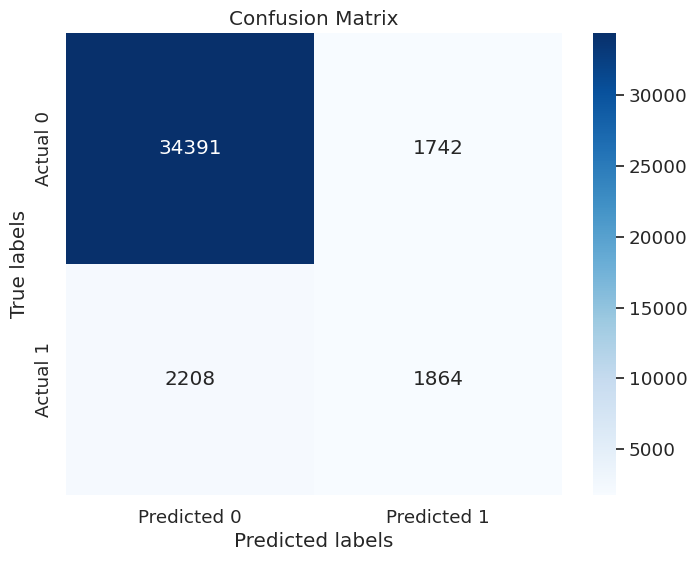

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(class_weight={0:0.3,1:0.7})
# clf = LogisticRegression(class_weight='balanced')

clf.fit(X_train, y_train)
# y_pred = (clf.predict_proba(X_test)[:, 1] >= 0.3).astype(int)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

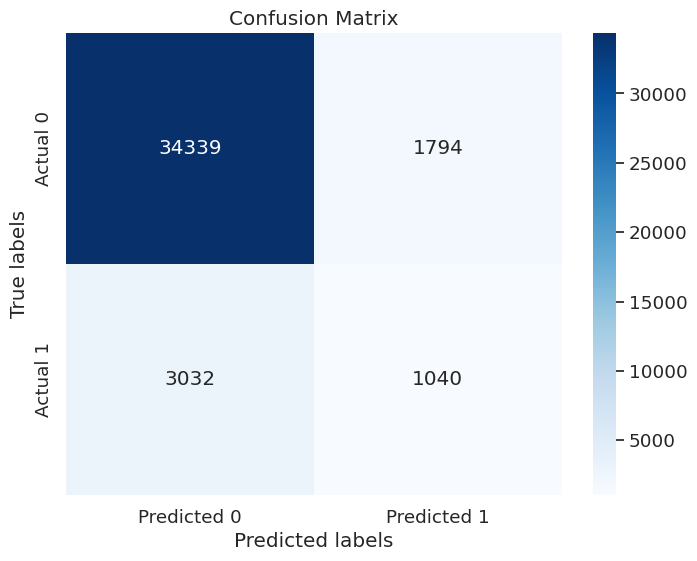

In [ ]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#@title MLP
import torch # torch

from torchvision import transforms # transform is used for data pre-processing
from torch.utils import data as Data
from torch.utils.data import Dataset # for dataset construction
from torch.utils.data import DataLoader

import torch.optim as optim

import numpy as np

import torch.nn as nn
import torch.nn.functional as F

In [ ]:
XTrain = torch.from_numpy(X_train.values)
# XVal = torch.from_numpy(X_val.values)
XTest = torch.from_numpy(X_test.values)

yTrain = torch.from_numpy(y_train.values)
# yVal = torch.from_numpy(y_val.values)
yTest = torch.from_numpy(y_test.values)

In [ ]:
class MyDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

train_dataset = MyDataset(XTrain, yTrain)
# val_dataset = MyDataset(XVal, yVal)
test_dataset = MyDataset(XTest, yTest)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(XTrain.shape[1], 128)
        # self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return x

In [ ]:
model = SimpleMLP()

loss = nn.CrossEntropyLoss(weight=torch.tensor(sum(y_train)/(np.bincount(y_train)*2), dtype=torch.float32))
# loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for i in range(25):
  model.train()
  train_acc, val_acc = [], []

  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(train_loader):
    X = X.float()
    optimizer.zero_grad()
    outputs = model(X)

    loss_value = loss(outputs, y)
    loss_value.backward()
    optimizer.step()

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()

    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  train_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: training accuracy is {train_acc[-1]:.4f}')

  model.eval()
  true_labs, pred_labs = [], []
  for batch, (X, y) in enumerate(test_loader):
    X = X.float()
    outputs = model(X)

    y_pred = torch.argmax(outputs, dim=1).cpu().numpy()
    y_true = y.cpu().numpy()
    true_labs.extend(y_true)
    pred_labs.extend(y_pred)

  val_acc.append(accuracy_score(true_labs, pred_labs))
  print(f'Epoch: [{i+1}/25]: validation accuracy is {val_acc[-1]:.4f}')

Epoch: [1/25]: training accuracy is 0.7626
Epoch: [1/25]: validation accuracy is 0.7652
Epoch: [2/25]: training accuracy is 0.7999
Epoch: [2/25]: validation accuracy is 0.7971
Epoch: [3/25]: training accuracy is 0.8222
Epoch: [3/25]: validation accuracy is 0.8206
Epoch: [4/25]: training accuracy is 0.8309
Epoch: [4/25]: validation accuracy is 0.8785
Epoch: [5/25]: training accuracy is 0.8331
Epoch: [5/25]: validation accuracy is 0.8242
Epoch: [6/25]: training accuracy is 0.8346
Epoch: [6/25]: validation accuracy is 0.7447
Epoch: [7/25]: training accuracy is 0.8333
Epoch: [7/25]: validation accuracy is 0.8174
Epoch: [8/25]: training accuracy is 0.8250
Epoch: [8/25]: validation accuracy is 0.8724
Epoch: [9/25]: training accuracy is 0.8382
Epoch: [9/25]: validation accuracy is 0.8482
Epoch: [10/25]: training accuracy is 0.8362
Epoch: [10/25]: validation accuracy is 0.8552
Epoch: [11/25]: training accuracy is 0.8392
Epoch: [11/25]: validation accuracy is 0.7757
Epoch: [12/25]: training acc

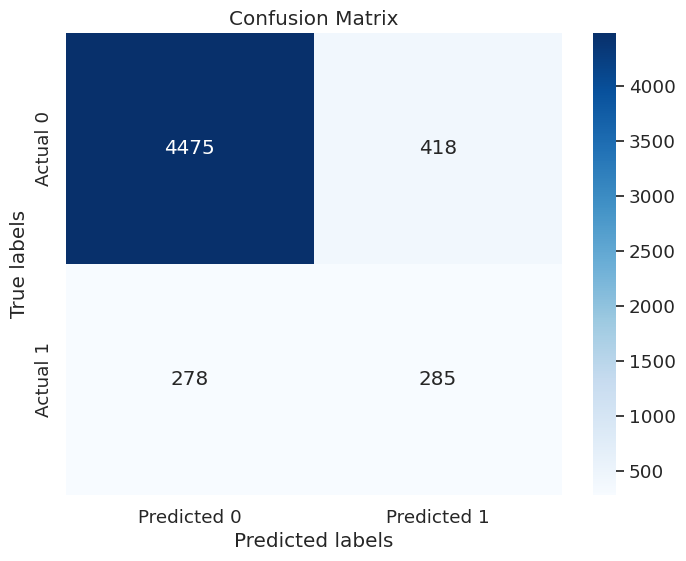

In [ ]:
conf_matrix = confusion_matrix(true_labs, pred_labs)

# Plot confusion matrix
sns.set(font_scale=1.2)  # Adjust font size if needed
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# import os
# from google.colab import drive
# drive.mount('/content/drive')
# data_path = '/content/drive/MyDrive/Colab Notebooks/Data Mining/Data'
# df14.to_csv(os.path.join(data_path, 'Data_Xinya_0408.csv'), index=False)
# # os.listdir(data_path)

In [ ]:
# df=pd.read_csv('https://drive.google.com/uc?export=download&id=12KieiuP24jrrpTQqT4lj9L5iUXyr63s1')
